<a href="https://colab.research.google.com/github/Ryanng72/AI/blob/main/AI_W4_24_2_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4c5393bc44a0f1b88989e2aa13ee5153251144f829d92d037b6b01343d6e0cfa
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


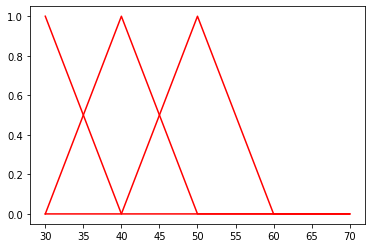

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange (30,71,1)
slow = fuzz.trimf(x,[30,30,40])
medium = fuzz.trimf(x,[30,40,50])
medium_fast =fuzz.trimf(x,[40,50,60])
fast = fuzz
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'r',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'r',linewidth=1.5,label='medium_fast')

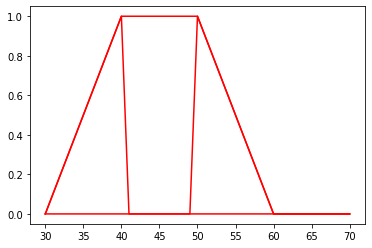

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange (30,71,1)
slow = fuzz.trapmf(x,[30,40,50,60])
medium = fuzz.trimf(x,[30,40,40])
fast = fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'r',linewidth=1.5,label='medium')
plt.plot(x,fast,'r',linewidth=1.5,label='fast')

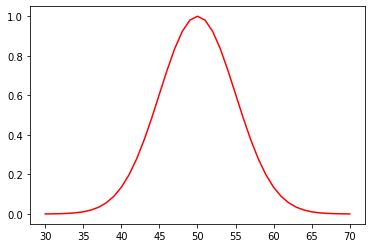

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange (30,71,1)
slow = fuzz.gaussmf(x,50,5)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')

20.68454303970134


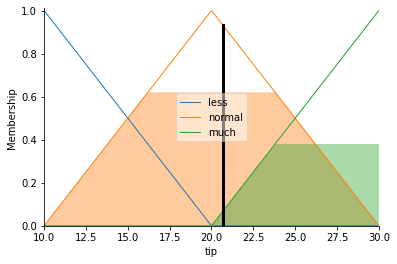

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good']= fuzz.trimf(food.universe, [5,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe, [0,5,10])
service['good']= fuzz.trimf(service.universe, [5,10,10])

tip['less'] = fuzz.trimf(tip.universe, [10,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule3 = ctrl.Rule(food['good'] & service['poor'], tip['less'])

rule4 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['good'] & service['average'], tip['normal'])

rule7 = ctrl.Rule(food['poor']& service['good'], tip['less'])
rule8 = ctrl.Rule(food['average'] & service['good'], tip['normal'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.9
tipping.input['service'] = 8.9
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

62.280652534965554


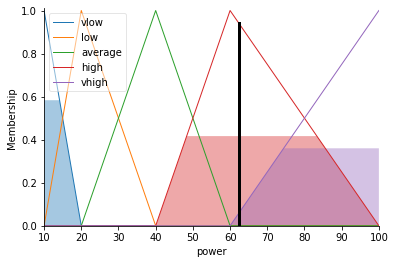

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(0,181,1),'time')
rice = ctrl.Antecedent(np.arange(0,1001,1),'rice')
power = ctrl.Consequent(np.arange(10,101,1),'power')

time['vfast']= fuzz.trimf(time.universe,[0,0,20])
time['fast'] = fuzz.trimf(time.universe, [0,20,40])
time['normal']= fuzz.trimf(time.universe, [20,40,100])
time['slow']= fuzz.trimf(time.universe, [40,100,180])
time['vslow']= fuzz.trimf(time.universe, [100,180,180])

rice['vlittle']= fuzz.trimf(rice.universe,[100,100,300])
rice['little'] = fuzz.trimf(rice.universe, [100,300,400])
rice['average']= fuzz.trimf(rice.universe, [300,400,500])
rice['much']= fuzz.trimf(rice.universe, [400,500,1000])
rice['vmuch']= fuzz.trimf(rice.universe,[500,1000,1000])

power['vlow'] = fuzz.trimf(power.universe, [10,10,20])
power['low'] = fuzz.trimf(power.universe,[10,20,40])
power['average'] = fuzz.trimf(power.universe,[20,40,60])
power['high'] = fuzz.trimf(power.universe,[40,60,100])
power['vhigh'] = fuzz.trimf(power.universe,[60,100,100])

#Rule
rule1 = ctrl.Rule(time['vfast'] & rice['vlittle'], power['high'])
rule2 = ctrl.Rule(time['vfast'] & rice['little'], power['high'])
rule3 = ctrl.Rule(time['vfast'] & rice['average'], power['vhigh'])
rule4 = ctrl.Rule(time['vfast'] & rice['much'], power['vhigh'])
rule5 = ctrl.Rule(time['vfast'] & rice['vmuch'], power['vhigh'])

rule6 = ctrl.Rule(time['fast'] & rice['vlittle'], power['high'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['high'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['vhigh'])
rule10 = ctrl.Rule(time['fast'] & rice['vmuch'],power['vhigh'])

rule11 = ctrl.Rule(time['normal'] & rice['vlittle'], power['vlow'])
rule12 = ctrl.Rule(time['normal'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['normal'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['vmuch'], power['vhigh'])
                   
rule16 = ctrl.Rule(time['slow'] & rice['vlittle'], power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['vlow'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['vlow'])
rule20 = ctrl.Rule(time['slow'] & rice['vmuch'], power['vlow'])

rule21 = ctrl.Rule(time['vslow'] & rice['vlittle'], power['vlow'])
rule22 = ctrl.Rule(time['vslow'] & rice['little'], power['vlow'])
rule23 = ctrl.Rule(time['vslow'] & rice['average'], power['vlow'])
rule24 = ctrl.Rule(time['vslow'] & rice['much'], power['vlow'])
rule25 = ctrl.Rule(time['vslow'] & rice['vmuch'], power['vlow'])

#view, input, output
ncpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                   rule6, rule7, rule8, rule9, rule10,
                                   rule11, rule12, rule13, rule14, rule15,
                                   rule16, rule17, rule18, rule19, rule20,
                                   rule21, rule22, rule23, rule24, rule25])
ncpower = ctrl.ControlSystemSimulation(ncpower_ctrl)
ncpower.input['time'] = 75
ncpower.input['rice'] = 680
ncpower.compute()
print(ncpower.output['power'])
power.view(sim = ncpower)